In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("C:/tmp/chicago/plans/trips.csv.gz")

# Convert timestamp
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'], format='%Y-%m-%dT%H:%M:%S.000')


C:\Users\steff\AppData\Local\Temp\ipykernel_23060\1541652623.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', len(patches))


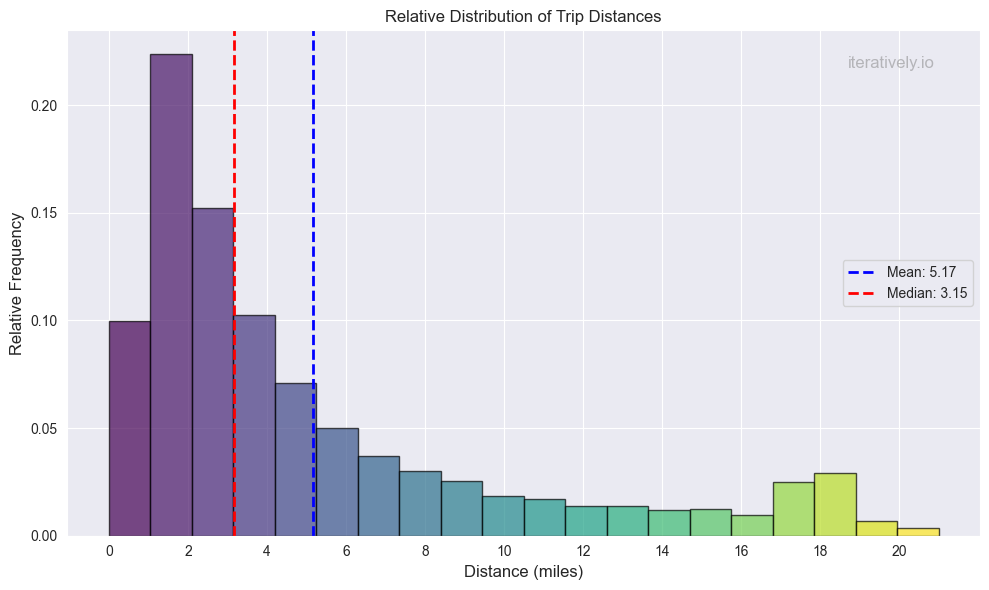

In [2]:

# Create a trip distance distribution
# Set style
sns.set_style("darkgrid")

# Filter out the top 1% of distances
distanceFilter = df['distance_miles'].quantile(0.99)
filtered_df = df[df['distance_miles'] <= distanceFilter]

# Create histogram with viridis color
fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = ax.hist(filtered_df['distance_miles'], bins=20, density=True, alpha=0.7, edgecolor='black')

# Apply viridis colormap
from matplotlib import cm
viridis = cm.get_cmap('viridis', len(patches))
for i, patch in enumerate(patches):
    patch.set_facecolor(viridis(i))

# Set titles and labels
ax.set_title('Relative Distribution of Trip Distances', fontsize=12)
ax.set_xlabel('Distance (miles)', fontsize=12)
ax.set_ylabel('Relative Frequency', fontsize=12)
ax.grid(True)

# Set x-ticks
range_max = filtered_df['distance_miles'].max()
xticks = np.arange(0, range_max, 2)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.0f}" for tick in xticks])

# Add branding text
ax.text(0.95, 0.95, 'iteratively.io', fontsize=12, color='gray', ha='right', va='top', alpha=0.5, transform=ax.transAxes)

# Add mean and median lines
mean_distance = filtered_df['distance_miles'].mean()
median_distance = filtered_df['distance_miles'].median()
ax.axvline(mean_distance, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_distance:.2f}')
ax.axvline(median_distance, color='red', linestyle='--', linewidth=2, label=f'Median: {median_distance:.2f}')
ax.legend()

# Save the plot
plt.tight_layout()
plt.savefig("relative_trip_distribution_viridis.png")



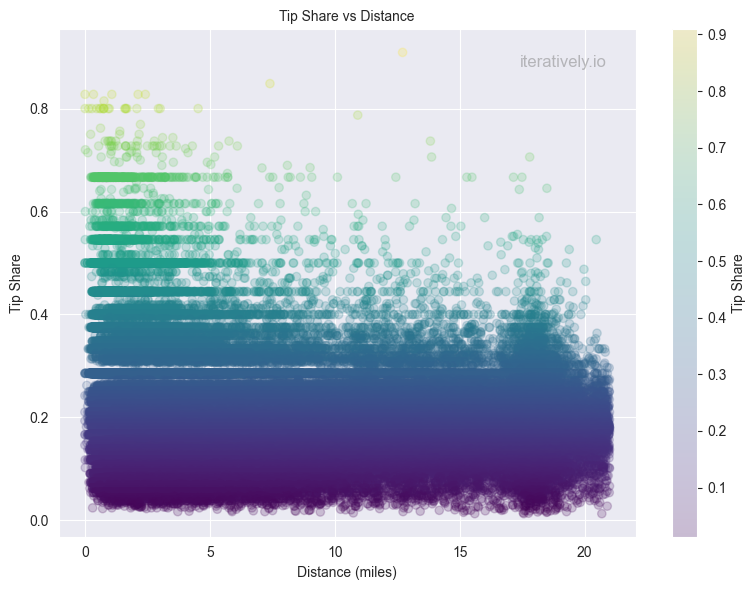

In [3]:
# Filter data
distanceFilter = df['distance_miles'].quantile(0.99)
tip_df = df[(df['distance_miles'] <= distanceFilter) & (df['tip_share'] > 0) & (df['tip_share'] < 1)]

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    tip_df['distance_miles'],
    tip_df['tip_share'],
    c=tip_df['tip_share'],
    cmap='viridis',
    alpha=0.2
)
fig.colorbar(scatter, ax=ax, label='Tip Share')
ax.set_title('Tip Share vs Distance', fontsize=10)
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Tip Share')
ax.grid(True)

# Add branding text
ax.text(0.95, 0.95, 'iteratively.io', fontsize=12, color='gray', ha='right', va='top', alpha=0.5, transform=ax.transAxes)

plt.tight_layout()
plt.savefig("tip_share_vs_distance.png")

